In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.manifold import TSNE

In [2]:
csv_path = Path("myopia.csv")
df = pd.read_csv(csv_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
myopia_df = df.drop(columns=["MYOPIC"])
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [5]:
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df[['AGE', 'SPHEQ', 'AL', 
                                                'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR','COMPHR','COMPHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

In [7]:
myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [8]:
new_myopia_df = pd.DataFrame(scaled_data, columns=myopia_df.columns[0:])
df2 = pd.DataFrame(scaled_data, columns=myopia_df.columns[0:])
new_myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.689311,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.361875,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.034439,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.689311,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.689311,-0.865922,-1.374503,0.987138,-0.996769


In [9]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(new_myopia_df)

In [10]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(myopia_pca)

In [11]:
pca.explained_variance_ratio_

array([0.2128081 , 0.16463666, 0.10868379, 0.08418244, 0.07729703,
       0.07279423, 0.06502223, 0.06191275, 0.0549301 ])

In [12]:
pca.explained_variance_ratio_.sum()

0.902267339862796

In [13]:
new_myopia_df["x"] = transformed_features[:,0]
new_myopia_df["y"] = transformed_features[:,1]
new_myopia_df["class"] = df["MYOPIC"]

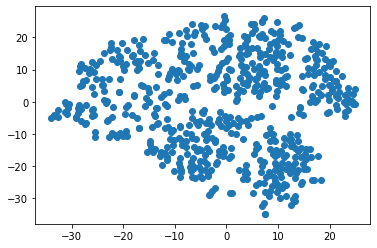

In [14]:
plt.scatter(new_myopia_df["x"], new_myopia_df["y"])
plt.show()

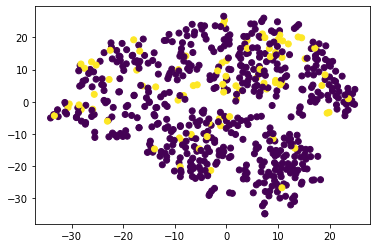

In [15]:
plt.scatter(new_myopia_df["x"], new_myopia_df["y"], c=new_myopia_df["class"])
plt.show()

In [16]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\calla\.conda\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,8652.000000
1,2,7506.741090
2,3,6719.257588
3,4,6268.006153
4,5,5954.551994


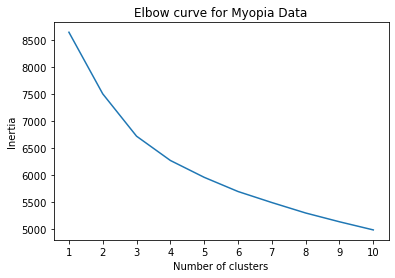

In [17]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia Data')
plt.show()

In [18]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [19]:
clusters = get_clusters(3, df2)

In [20]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.689311,0.184058,0.498304,0.987138,1.003241,2
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.361875,-0.340932,-0.875088,0.987138,1.003241,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.034439,0.184058,-0.750234,-1.013030,-0.996769,2
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.689311,-0.865922,0.685585,-1.013030,1.003241,2
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.689311,-0.865922,-1.374503,0.987138,-0.996769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,1.602740,0.884045,0.685585,0.987138,-0.996769,0
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.361875,-0.165935,-0.999941,0.987138,1.003241,1
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.689311,-0.865922,-1.374503,0.987138,1.003241,1
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.361875,1.059042,-0.188392,-1.013030,-0.996769,2


In [21]:
def show_clusters(df):
    plt.scatter(df['ACD'], df['LT'], c=df['class'])
    plt.xlabel('ACD')
    plt.ylabel('LT')
    plt.show()

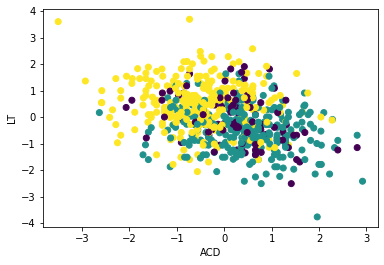

In [22]:
show_clusters(clusters)

In [23]:
#Myopia Results and recommendations
#1 the t-sne was not very clear in finding the number of clusters. I came to a more clear conclusion from K-Means.
#2 The patterns are clearer in the K-Means clustering anaylsis but still not exactly clear. I think there needs to be more data.
# to get a clearer analysis of the data.
#3 I think that 3 clusters may be the best based on the elbow curve graph and based pca explained ratio the amounts get 
# closer together after the after .1086...
###### Finallly I recommend to the supervisor that we add to the dataset and run more training excersises to find the best fits.
# currently the data is limited in the information we can get out of it.